In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

## Analysis on lung cancer patients in the world

In [2]:
df = pd.read_csv('lung_cancer_prediction.csv')
df.head()

,Country,Age,Gender,Smoking_Status,Second_Hand_Smoke,Air_Pollution_Exposure,Occupation_Exposure,Rural_or_Urban,Socioeconomic_Status,Healthcare_Access,...,Treatment_Access,Clinical_Trial_Access,Language_Barrier,Mortality_Risk,5_Year_Survival_Probability,Delay_in_Diagnosis,Family_History,Indoor_Smoke_Exposure,Tobacco_Marketing_Exposure,Final_Prediction
0,Russia,82,Male,Former Smoker,Yes,Medium,No,Urban,High,Limited,...,Partial,Yes,No,0.263278,0.797576,Yes,No,No,No,No
1,Thailand,66,Female,Former Smoker,No,High,No,Rural,Middle,Good,...,Partial,Yes,No,0.154697,0.336674,Yes,No,No,Yes,No
2,Colombia,87,Male,Former Smoker,No,Medium,No,Urban,Low,Poor,...,Partial,Yes,No,0.607435,0.063621,No,No,No,Yes,No
3,Egypt,51,Female,Former Smoker,No,Low,Yes,Rural,High,Good,...,Full,No,No,0.081184,0.336814,No,No,No,Yes,No
4,DR Congo,43,Male,Former Smoker,No,High,No,Urban,Middle,Good,...,Full,No,No,0.643276,0.820103,No,No,No,No,No


Shape of the dataset

In [5]:
df.shape

(460292, 25)

Information about dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460292 entries, 0 to 460291
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      460292 non-null  object 
 1   Age                          460292 non-null  int64  
 2   Gender                       460292 non-null  object 
 3   Smoking_Status               460292 non-null  object 
 4   Second_Hand_Smoke            460292 non-null  object 
 5   Air_Pollution_Exposure       460292 non-null  object 
 6   Occupation_Exposure          460292 non-null  object 
 7   Rural_or_Urban               460292 non-null  object 
 8   Socioeconomic_Status         460292 non-null  object 
 9   Healthcare_Access            460292 non-null  object 
 10  Insurance_Coverage           460292 non-null  object 
 11  Screening_Availability       460292 non-null  object 
 12  Stage_at_Diagnosis           460292 non-null  object 
 13 

Mathematical Summary of numerical columns

In [9]:
df.describe()

,Age,Mortality_Risk,5_Year_Survival_Probability
count,460292.000000,460292.000000,460292.000000
mean,60.044183,0.500113,0.499866
std,17.590029,0.259828,0.260258
min,30.000000,0.050002,0.050001
25%,45.000000,0.274948,0.274252
50%,60.000000,0.500361,0.499002
75%,75.000000,0.725412,0.726071
max,90.000000,0.949997,0.949998


## Identifying countries with the highest number of lung cancer patients

In [5]:
mask = df['Final_Prediction'] == 'Yes'
df_temp = df[mask]

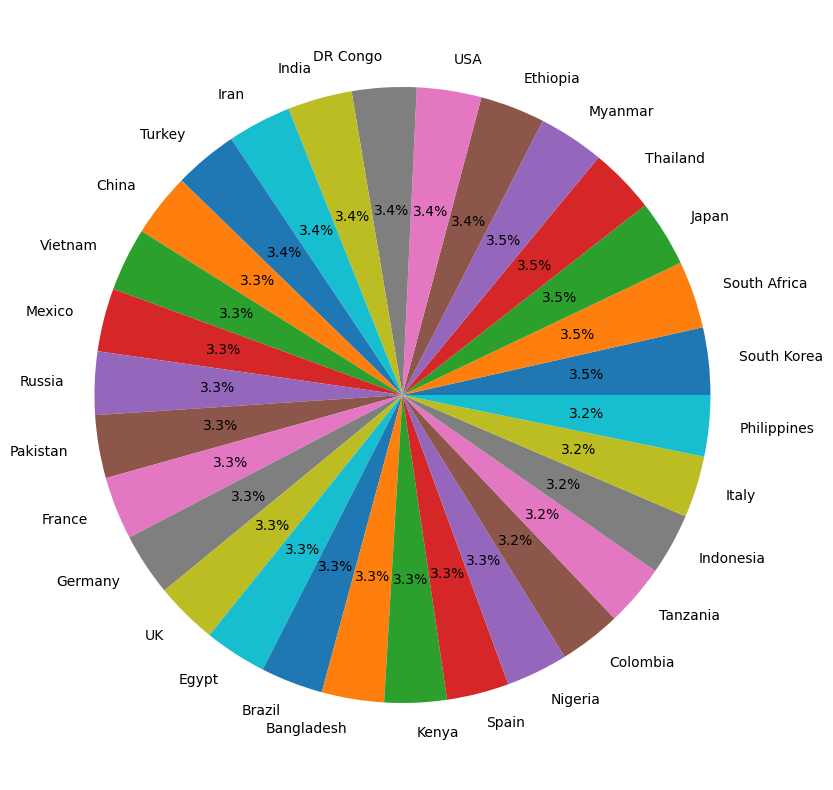

In [7]:
#using matplotlib
counts =df_temp['Country'].value_counts()
plt.figure(figsize = (10,10))
plt.pie(counts, labels = counts.index, autopct ='%0.1f%%')
plt.show()

## Gender distribution of lung cancer patients

<Axes: ylabel='count'>

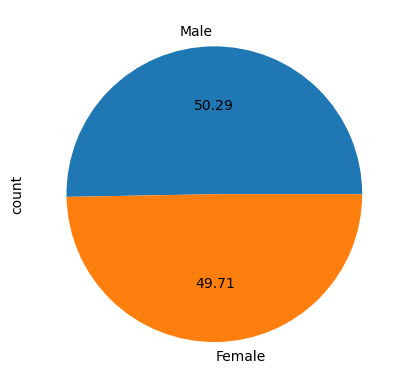

In [49]:
# using pandas plot
df_temp['Gender'].value_counts().plot(kind = 'pie', autopct = '%.2f')

## Mortality risk analysis based on Gender, Age and Smoking Status

<Figure size 1000x1000 with 0 Axes>

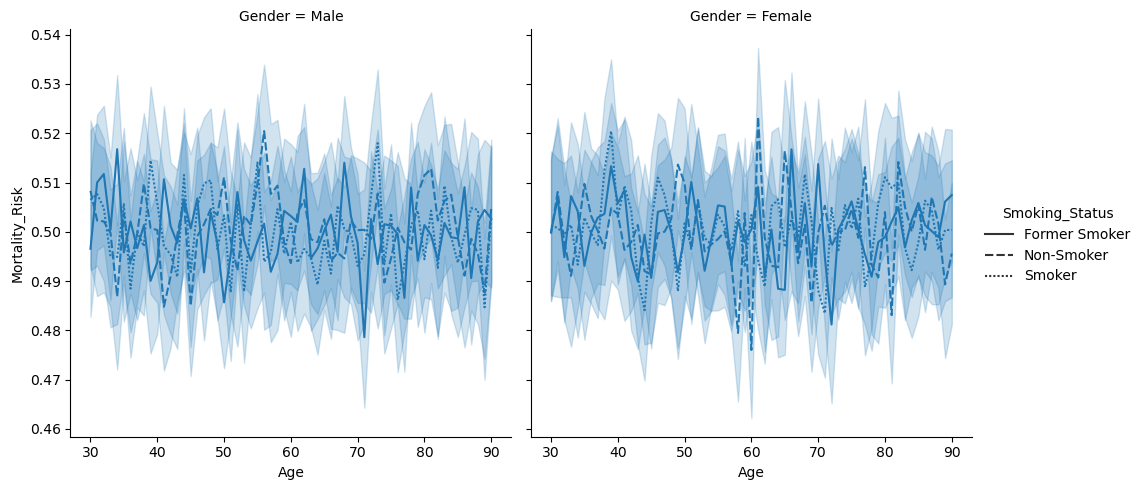

In [19]:
plt.figure(figsize=(10,10))
sns.relplot(data = df, x = 'Age', y = 'Mortality_Risk', kind = 'line', col = 'Gender', style = 'Smoking_Status')

## Age group with the highest lung cancer

Text(0.5, 1.0, 'Age wise distribution of Lung Cancer patients')

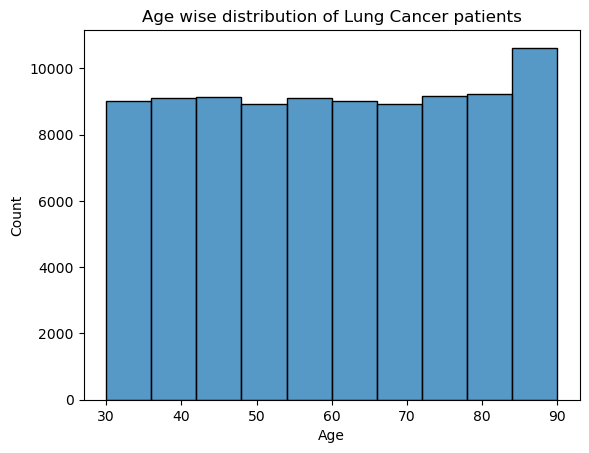

In [24]:
sns.histplot(data = df_temp , x = 'Age', bins = 10)
plt.title('Age wise distribution of Lung Cancer patients')

## Heatmap of 5 year survival probability by country and age

In [50]:
pt = df.pivot_table(index = 'Country', columns = 'Age', values = '5_Year_Survival_Probability', aggfunc = 'mean')

<Axes: xlabel='Age', ylabel='Country'>

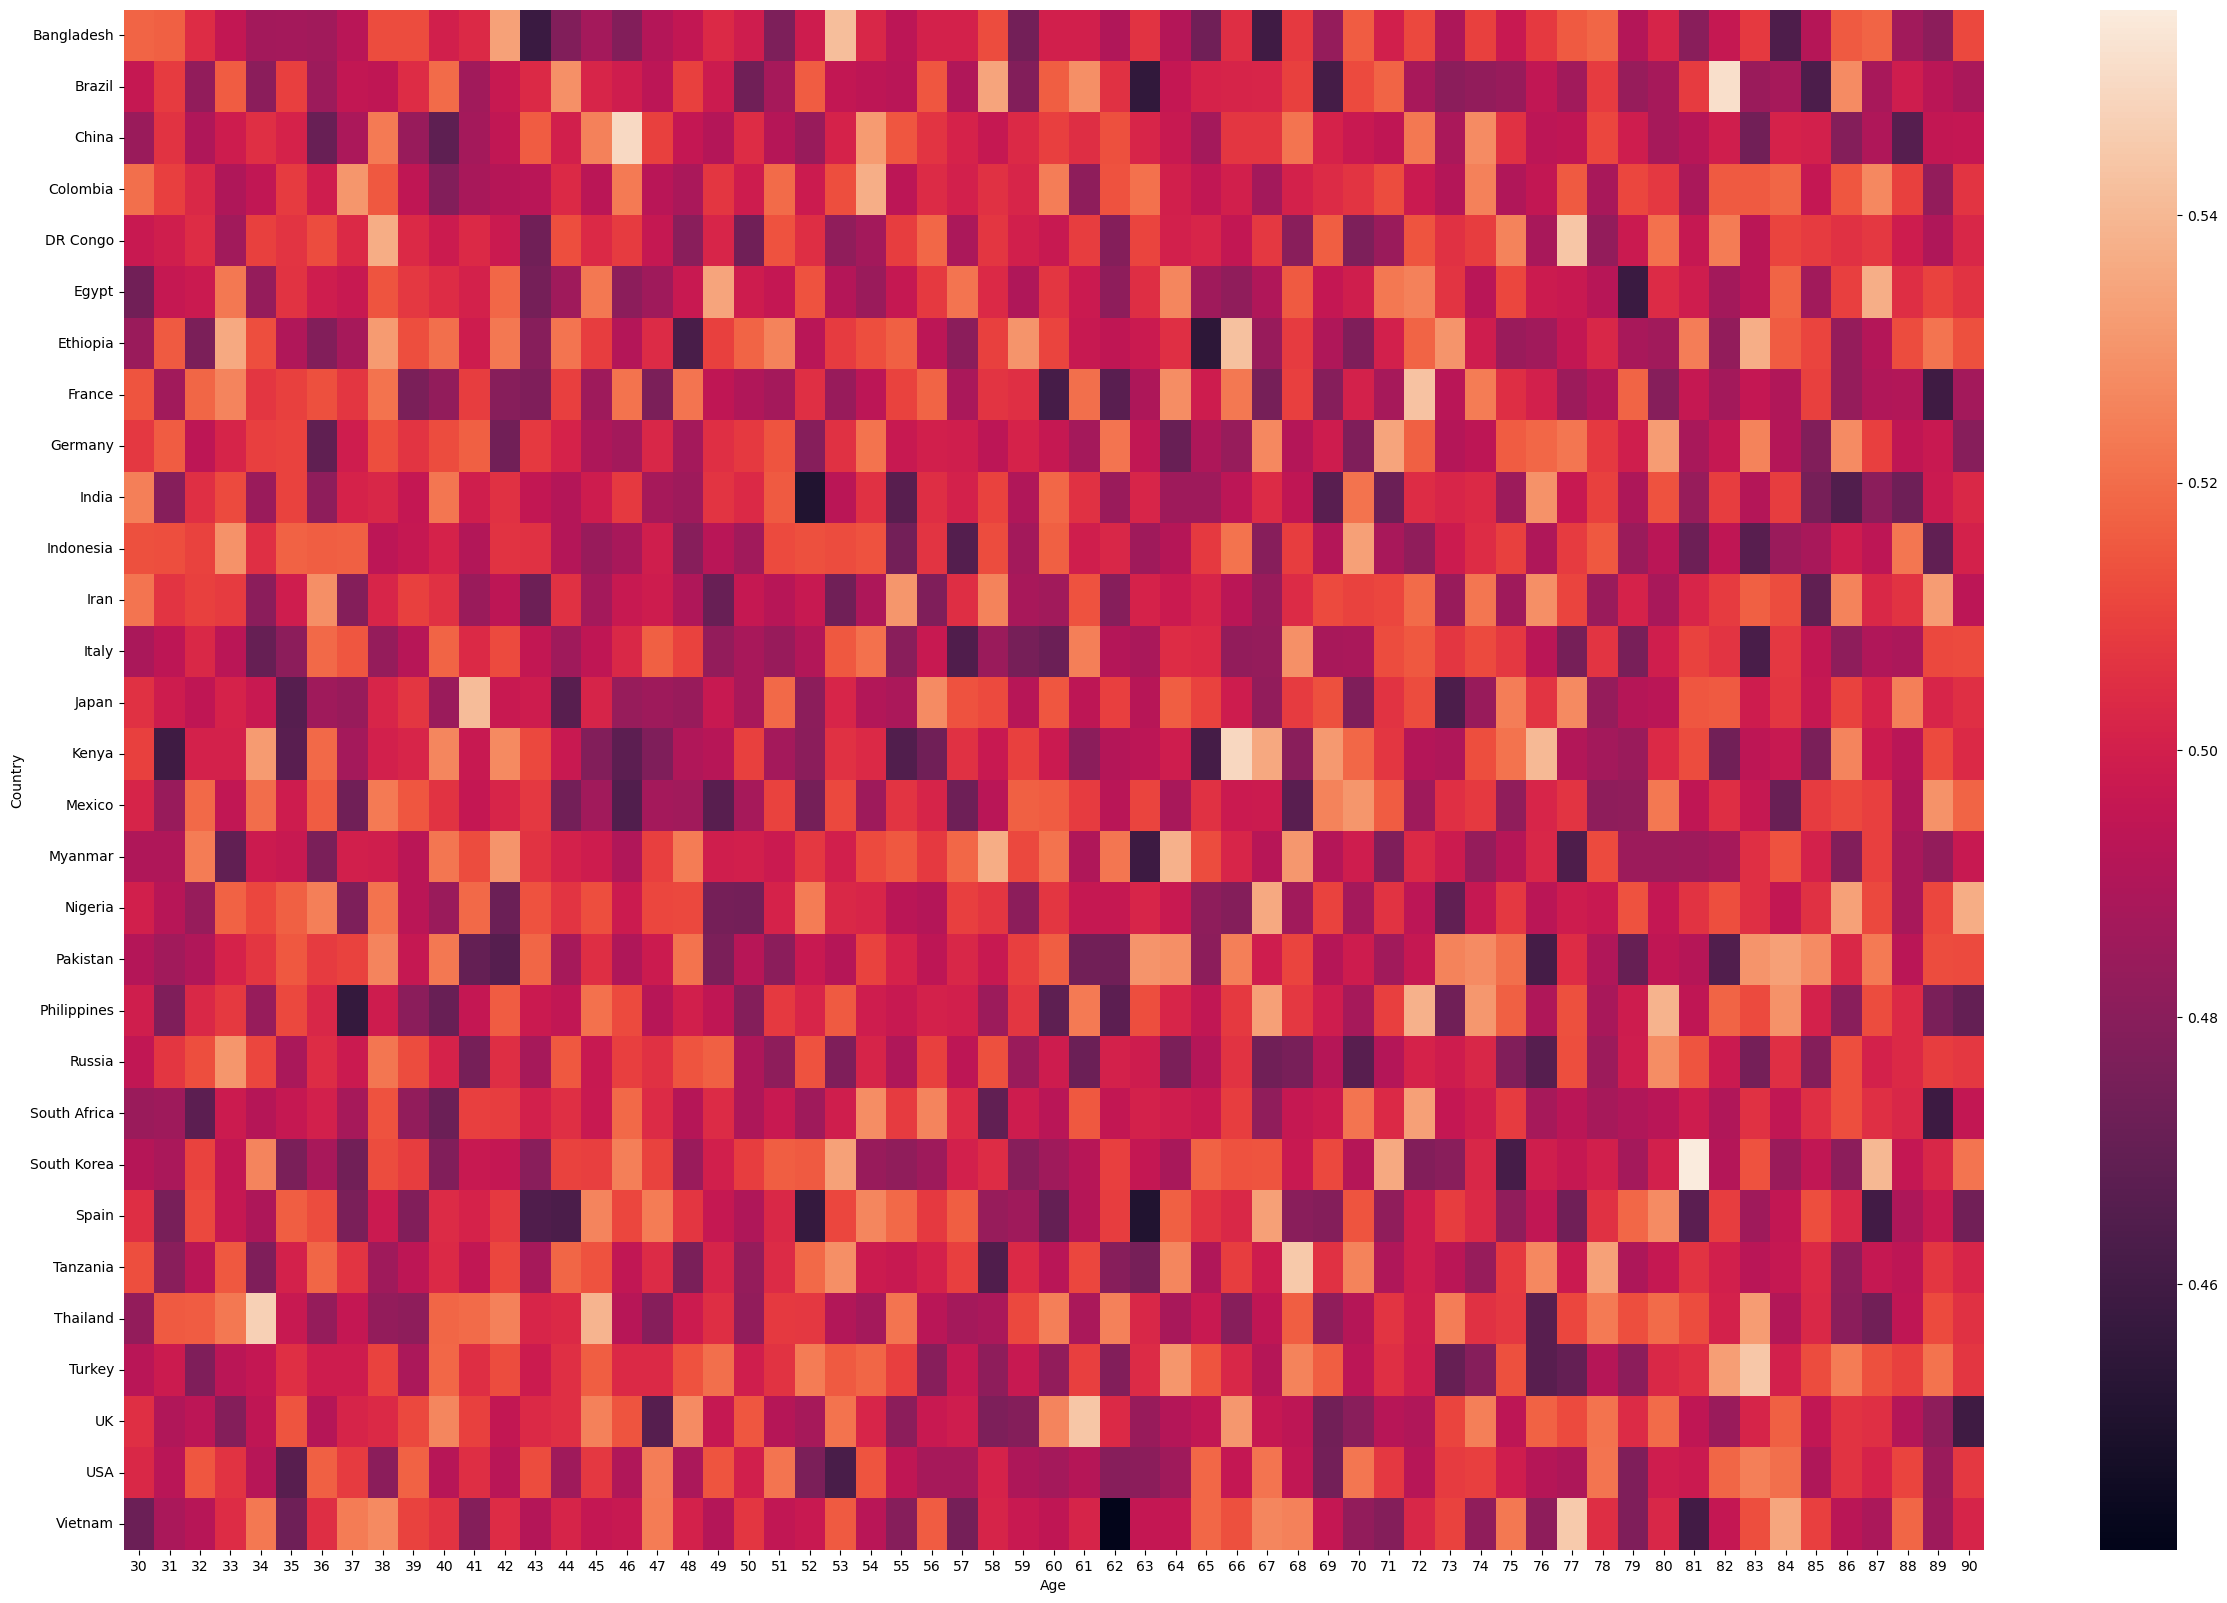

In [54]:
plt.figure(figsize = (30,20))
sns.heatmap(pt)

# Bangladesh

## Analysis on lung cancer patients in Bangladesh

In [44]:
maskBD = df['Country'] == 'Bangladesh'
maskbd = df['Final_Prediction'] == 'Yes'

bd = df[maskBD & maskbd]

In [46]:
bd.head()

,Country,Age,Gender,Smoking_Status,Second_Hand_Smoke,Air_Pollution_Exposure,Occupation_Exposure,Rural_or_Urban,Socioeconomic_Status,Healthcare_Access,...,Treatment_Access,Clinical_Trial_Access,Language_Barrier,Mortality_Risk,5_Year_Survival_Probability,Delay_in_Diagnosis,Family_History,Indoor_Smoke_Exposure,Tobacco_Marketing_Exposure,Final_Prediction
379,Bangladesh,48,Male,Former Smoker,No,High,No,Urban,Low,Poor,...,NaN,No,No,0.252751,0.664794,No,No,Yes,Yes,Yes
409,Bangladesh,32,Male,Smoker,No,Low,Yes,Urban,Middle,Limited,...,Full,No,No,0.718793,0.489374,No,Yes,Yes,No,Yes
539,Bangladesh,73,Female,Former Smoker,No,Low,Yes,Urban,Low,Limited,...,Full,No,No,0.662191,0.160608,No,No,Yes,No,Yes
643,Bangladesh,40,Male,Smoker,Yes,Medium,No,Urban,High,Good,...,Full,Yes,No,0.255923,0.431368,Yes,No,No,No,Yes
897,Bangladesh,31,Female,Former Smoker,No,Low,Yes,Urban,Low,Limited,...,Full,No,No,0.685247,0.206951,No,No,No,No,Yes


In [48]:
bd.shape

(3012, 25)

## Analysis of Age , 5 year survival probability , gender , smoking status

<Figure size 5000x7000 with 0 Axes>

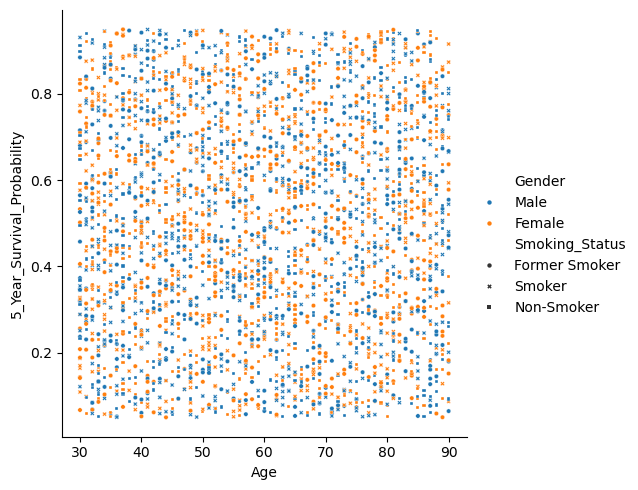

In [78]:
plt.figure(figsize = (50,70))
sns.relplot(data = bd, x = 'Age', y = '5_Year_Survival_Probability',kind = 'scatter', s = 10, hue = 'Gender', style = 'Smoking_Status')

## Analysis of age and Air pollution exposure

Text(0.5, 1.0, 'Air pollution exposure by Age')

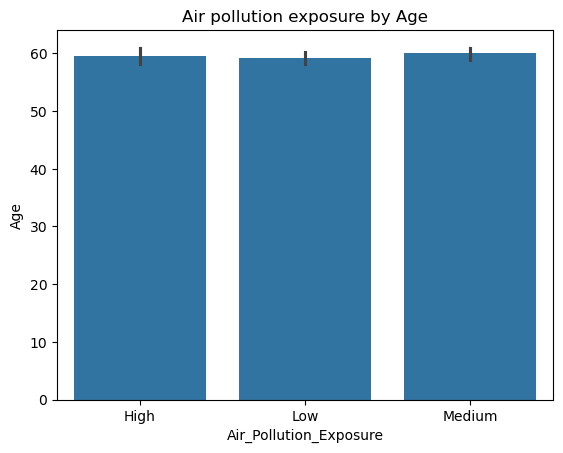

In [88]:
sns.barplot(data = bd, x ='Air_Pollution_Exposure', y ='Age')
plt.title('Air pollution exposure by Age')

## Analysis on Second Hand Smoke

array([<Axes: ylabel='count'>], dtype=object)

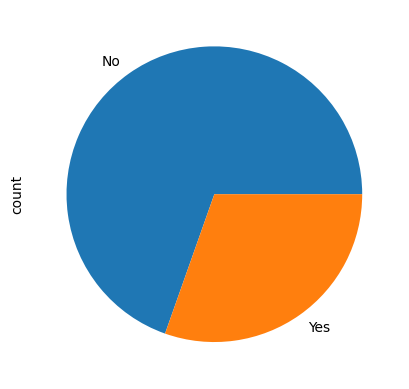

In [150]:
bd['Second_Hand_Smoke'].value_counts().plot(kind = 'pie', subplots = True)

## Analysis on Socioeconomic_Status

array([<Axes: ylabel='count'>], dtype=object)

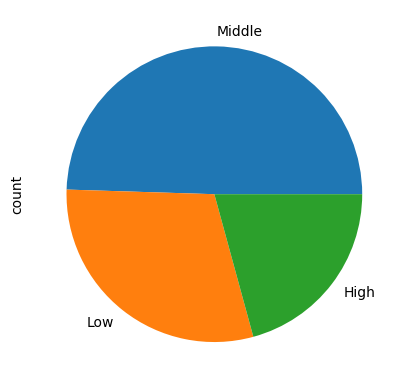

In [112]:
bd['Socioeconomic_Status'].value_counts().plot(kind = 'pie', subplots = True)

### Analysis on Age , Rural or Urban people, Healthcare Access and 5 Year Survival Probability of Bangladeshi Lung Cancer Patients

In [145]:
ptbd = bd.pivot_table(index = 'Age', columns = ['Rural_or_Urban', 'Healthcare_Access'], values = '5_Year_Survival_Probability', aggfunc = 'mean')

In [147]:
ptbd

Rural_or_Urban        Rural                         Urban                    
Healthcare_Access      Good   Limited      Poor      Good   Limited      Poor
Age                                                                          
30                 0.639221  0.615907  0.506815  0.454236  0.385375  0.516241
31                 0.449981  0.582839  0.410226  0.470806  0.704230  0.632202
32                 0.392117  0.420542  0.440581  0.542516  0.484958  0.472475
33                 0.383780  0.786166  0.476775  0.480570  0.372296  0.321067
34                 0.472767  0.435005  0.195482  0.506108  0.505564  0.569907
..                      ...       ...       ...       ...       ...       ...
86                 0.527093  0.738729  0.655337  0.552747  0.483253  0.536490
87                 0.678163  0.560445  0.497886  0.456458  0.393045  0.533882
88                 0.568762  0.446326  0.394844  0.498674  0.573658  0.365501
89                 0.427806  0.466184  0.353440  0.483710  0.448975  0.517388
90                 0.404134  0.485987  0.593787  0.495567  0.622230  0.484945

[61 rows x 6 columns]

<Axes: xlabel='Rural_or_Urban-Healthcare_Access', ylabel='Age'>

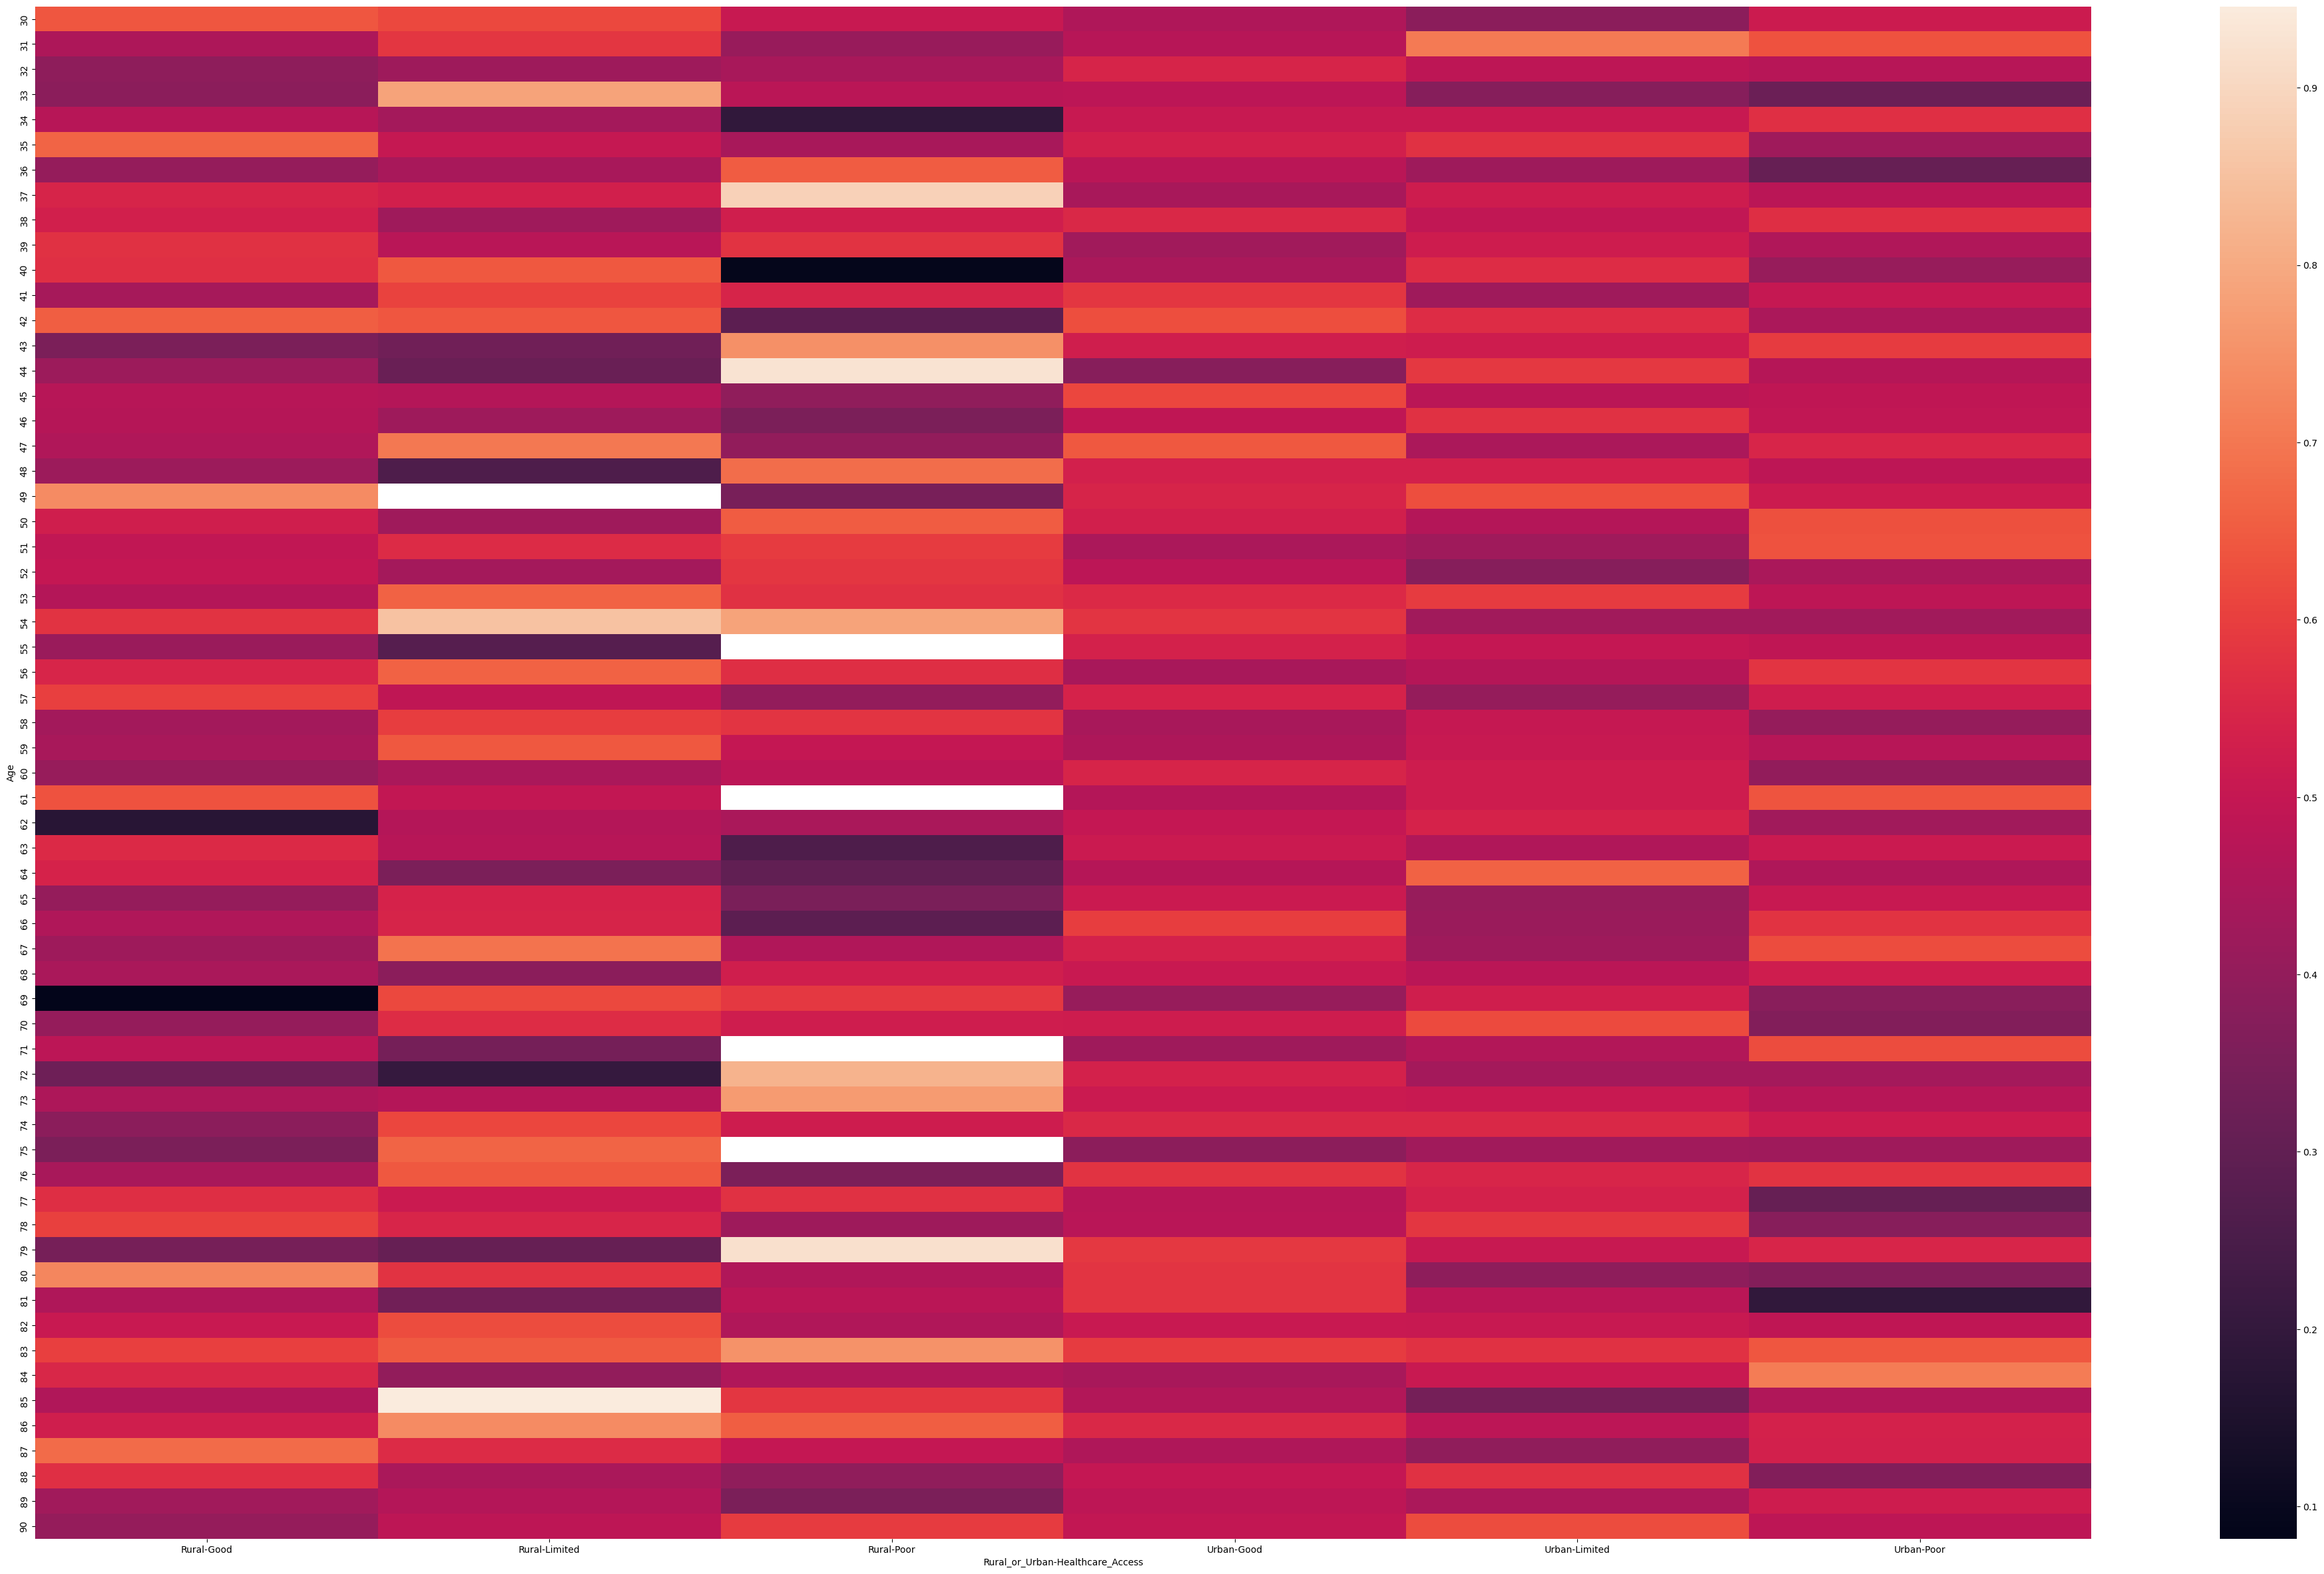

In [138]:
plt.figure(figsize = (50,30))
sns.heatmap(ptbd)